# 결정 트리 모델 시각화

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


## 학습 데이터, 테스트 데이터 셋 분리

In [2]:
iris_data = load_iris()

x_train, x_test, y_train, y_test = train_test_split(iris_data.data,
                                                    iris_data.target,
                                                    test_size=0.2,
                                                    random_state=11,
                                                   )

## 하이퍼파라미터 조정 않함 : default

In [3]:
## 1. 결정트리 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

## 2. 학습
dt_clf.fit(x_train, y_train)

## 3. 예측(테스트)
pred = dt_clf.predict(x_test)

## 4. 평가(정확도)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
f'테스트 데이터 세트 정확도 : {acc}'

'테스트 데이터 세트 정확도 : 0.9333333333333333'

In [4]:
## depth 확인
dt_clf.get_depth()

5

In [5]:
## leaf node 수 확인
dt_clf.get_n_leaves()

9

In [6]:
# !pip install graphviz

In [7]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,
                out_file='tree.dot',
                class_names=iris_data.target_names,
                feature_names=iris_data.feature_names,
                filled=True,
               )

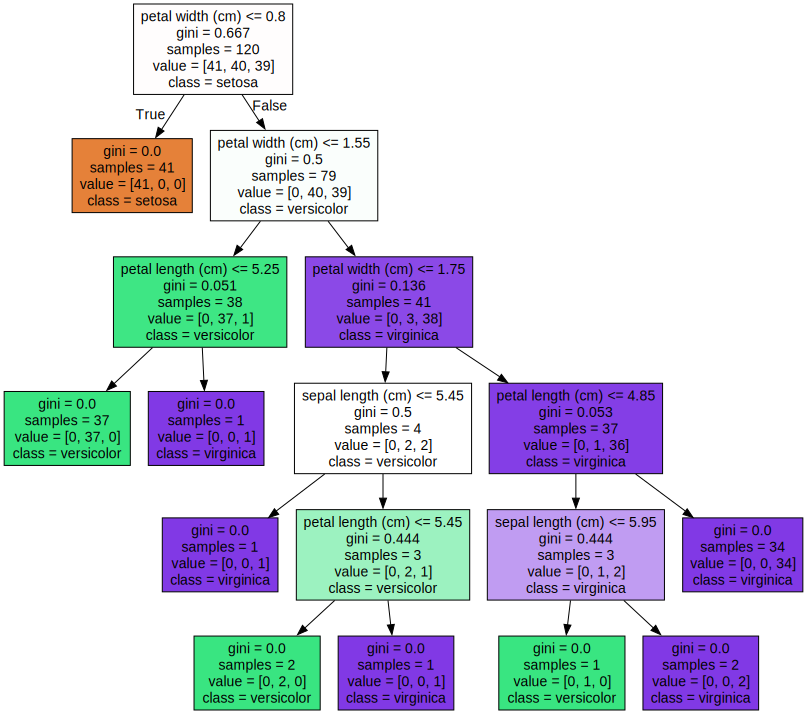

In [8]:
import graphviz

with open('tree.dot') as file:
    graph = file.read()
    
graphviz.Source(graph)

In [9]:
g_s =graphviz.Source(graph)
g_s.render(filename='iris_파라미터 조정x', format='png')

'iris_파라미터 조정x.png'

## 하이퍼 파라미터 조정 : max_depth=3

In [10]:
## 1. 결정트리 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11,
                               max_depth=3,
                               )

## 2. 학습
dt_clf.fit(x_train, y_train)

## 3. 예측(테스트)
pred = dt_clf.predict(x_test)

## 4. 평가(정확도)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
f'테스트 데이터 세트 정확도 : {acc:.4f}'

'테스트 데이터 세트 정확도 : 0.9333'

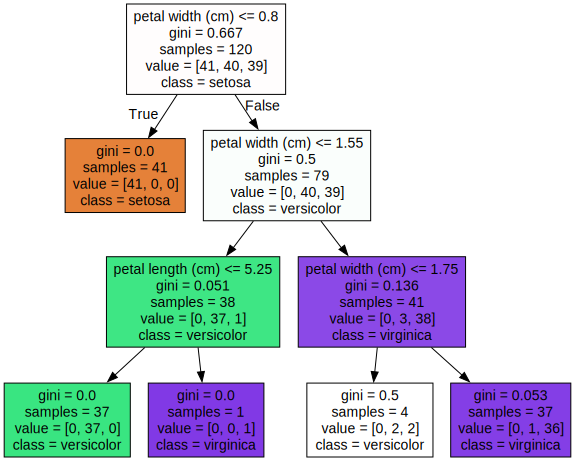

In [11]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,
                out_file='max_depth_3.dot',
                class_names=iris_data.target_names,
                feature_names=iris_data.feature_names,
                filled=True,
               )

import graphviz

with open('max_depth_3.dot') as file:
    graph = file.read()
    
graphviz.Source(graph)

In [12]:
dt_clf.get_depth()

3

In [13]:
#분류가된 데이터 true만 주황과 맨아래 뎁스
dt_clf.get_n_leaves()

5

In [14]:
## 하이퍼- 파라미터 조정 : min_samples_leaf = 4

In [15]:
## 1. 결정트리 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11,
                               min_samples_leaf= 4,
                               )

## 2. 학습
dt_clf.fit(x_train, y_train)

## 3. 예측(테스트)
pred = dt_clf.predict(x_test)

## 4. 평가(정확도)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
f'테스트 데이터 세트 정확도 : {acc:.4f}'

'테스트 데이터 세트 정확도 : 0.9333'

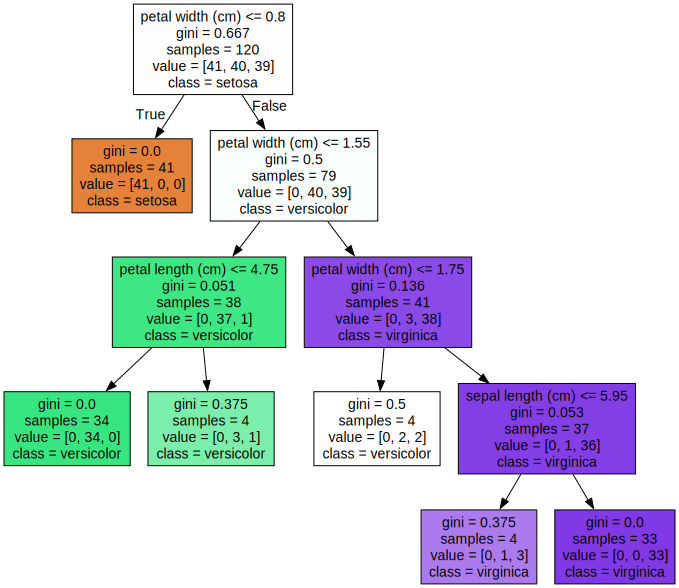

In [16]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,
                out_file='min_depth_leaf4.dot',
                class_names=iris_data.target_names,
                feature_names=iris_data.feature_names,
                filled=True,
               )

import graphviz

with open('min_depth_leaf4.dot') as file:
    graph = file.read()
    
graphviz.Source(graph)

In [17]:
dt_clf.get_depth()

4

In [18]:
dt_clf.get_n_leaves()

6

In [ ]:
## 하이퍼- 파라미터 조정 : min_samples_split=4

In [36]:
## 1. 결정트리 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11,
                               min_samples_split=35,
                                max_depth=5,
                                min_samples_leaf= 4,
                               )

## 2. 학습
dt_clf.fit(x_train, y_train)

## 3. 예측(테스트)
pred = dt_clf.predict(x_test)

## 4. 평가(정확도)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
f'테스트 데이터 세트 정확도 : {acc:.4f}'

'테스트 데이터 세트 정확도 : 0.9333'

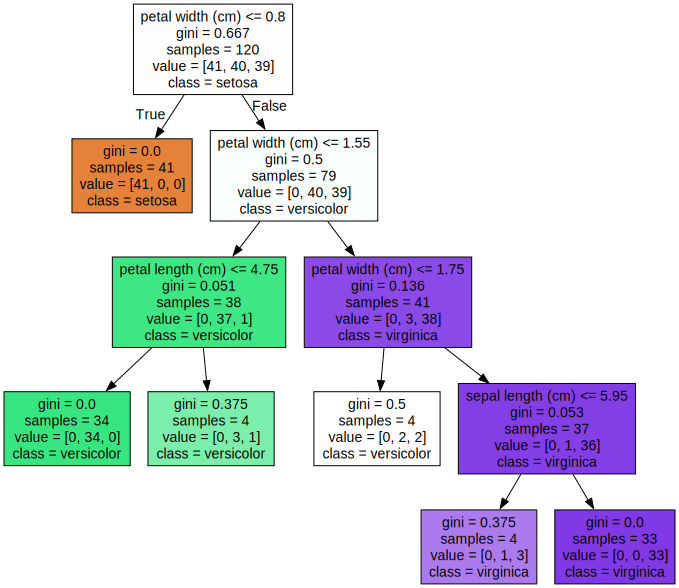

In [37]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,
                out_file='min_depth_split4.dot',
                class_names=iris_data.target_names,
                feature_names=iris_data.feature_names,
                filled=True,
               )

import graphviz

with open('min_depth_split4.dot') as file:
    graph = file.read()
    
graphviz.Source(graph)

In [38]:
dt_clf.get_depth()

4

In [39]:
dt_clf.get_n_leaves()

6

In [40]:
# feature importance 추출
import seaborn as sns
import numpy as np

In [41]:
dt_clf.feature_importances_

array([0.00594727, 0.        , 0.00596624, 0.98808649])

In [42]:
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(f'{name}:{value}')

sepal length (cm):0.005947267560959518
sepal width (cm):0.0
petal length (cm):0.005966238111393152
petal width (cm):0.9880864943276473


<Axes: >

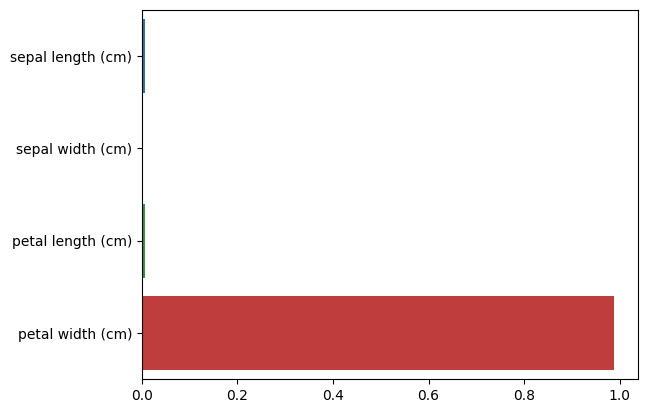

In [43]:
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)